# Strings in Python

The material in this notebook might seem overly pedantic, but it turns out to be  very important to get these ideas straight before we begin trying to do any sort of text processing in Python. In fact, if you read the documentation fo the re (regular expressions) package in Python, one of the very first comments is about mixing unicode strings and bytes objects.

It used to be the case that text for computers was handled using a very small character set called the American Standard Code for Information Interchange (ASCII) set. This consisted of 128 characters (represented using 7 bits).
Dealing with text and computers was simpler (well, for people who used this particular set of characters) back in those days but it became apparent eventually that more characters were needed. Unicode was created to remedy this. In Python, strings can represent the entire collection of unicode characters (there are around 1.1 million possible characters - with most possibilities unused at this point).

http://www.asciitable.com/

In Python, a distinction is made between unicode strings (strings of unicode characters by default using the utf-8 encoding) and bytes object (byte strings). A bytes object consists of a sequence of 8 bit bytes. A unicode string consists of unicode characters. Let's review some information about strings in Python.

First, we can define a string using quotes.

In [3]:
mystring="This is a string"

We can refer to specific characters in the string by number.

In [5]:
mystring[5]

'i'

We can slice using a range.

In [6]:
mystring[2:4]

'is'

Strings are "iterables"

In [8]:
ctr=0
for c in mystring:
    if ctr>5:
        break
    print(c)
    ctr=ctr+1

T
h
i
s
 
i


We can concatenate strings using +.

In [10]:
mystring1="my dog is"
mystring2=" Sasha"
mystring=mystring1+mystring2
print(mystring)

my dog is Sasha


We can test for whether a string contains a substring.

In [12]:
res1="Sas" in mystring
res2="DOG" in mystring
print(res1)
print(res2)


True
False


Strings in Python are immutable. We can't change a string. 

In [14]:
mystring.replace("dog","cat")
print(mystring)

my dog is Sasha


However, we can define a new string with the same name, which over-writes the old one.

In [15]:
mystring="My dog is Sasha"
mystring=mystring.replace("dog","cat")
print(mystring)

My cat is Sasha


# Unicode characters

Python strings by default allow for more general characteres, referred to as unicode characters

We will talk more soon about how this all works specifically. The key issue to be aware of for now is that the standard ascii character set only allows for 128 possible characters. Unicode allows for many, many more characters, one for every decimal in the range 0,1,....,n-1, where n = 1,114,112.

Some characters are white-space characters, i.e. we can't actually see them. These include the space character, the tab character and the line feed character. If we want one of these to be put into a string, we can use various methods. One method is to use the backslash as an escape.

In [90]:
string1="My dog is adorable.\nHow is your dog?"
print(string1)

My dog is adorable.
How is your dog?


We can specify a unicode character by a decimal referred to as a "code point".  The chr function takes an integer code point and returns its corresponding unicode character. This mapping extends the ascii table beyond the 128 entries.

In [92]:
string2="My dog is adorable."+chr(10)+"How is your dog" + chr(63)
print(string2)
print(string1==string2)

My dog is adorable.
How is your dog?
True


In the following we create a string of all of the non whitespace ascii characters, which are the characters whose codes are in the range 32,...,127.

In [83]:
s=chr(32)
for i in range(32,128):
    s=s+chr(i)
print(s)

  !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


But we can get so many more characters using chr. Here is an interesting exercise. Write an expression in chinese and find its unicode representation. Take an expression in english, translate it into chinese using Google translate, then copy the characters to this site

    https://www.chinese-tools.com/tools/converter-unicode.html

to get the unicode. 

I translated "computing is fun" to chinese (simplified) to obtain 计算很有趣  then I copied this to the site above to get this output:

&#35745;&#31639;&#24456;&#26377;&#36259;


In [105]:
message=chr(35745)+chr(31639)+chr(24456)+chr(26377)+chr(36259)
print(message)
message

计算很有趣


'计算很有趣'

For a better understanding of how unicode coding allows us to go from bytes to characters, check out this YouTube video:

    https://www.youtube.com/watch?v=MijmeoH9LT4&t=488s


The inverse function to chr is the ord function.

In [111]:
c=chr(35745)
print(c)
n=ord(c)
print(n)

计
35745


# Writing strings to a file

To write strings consisting of ascii characters to a file we open the file, use the write method then close it.

In [132]:
str1="My dog is so cool."
str2="How about your dog?"
str3="Oh, you don't have a dog!"
fout=open("output.txt","w")
fout.write(str1+"\n")
fout.write(str2+"\n")
fout.write(str3+"\n")
fout.close()

In [154]:
str4="This is a string with an extended ascii character" + chr(227)
print(str4)
fout=open("output.txt3","w")
fout.write(str1+"\n")
fout.write(str2+"\n")
fout.write(str3+"\n")
fout.close()

This is a string with an extended ascii characterã


Things are not so clear when it comes to writing strings with characters that are not among the extended ascii characters.

In [204]:
message="This is a string with a non extended ascii character " + chr(330)
print(message)
fout=open("output4.txt","w")
fout.write(message)
fout.close()

This is a string with a non extended ascii character Ŋ


UnicodeEncodeError: 'charmap' codec can't encode character '\u014a' in position 53: character maps to <undefined>

# Reading lines from a text file. 

In [135]:
fin=open("output.txt","r")
L=[]
for line in fin:
    L.append(line)
fin.close()
print(L)

['My dog is so cool.\n', 'How about your dog?\n', "Oh, you don't have a dog!\n"]


# Byte strings and byte objects

On the one hand, when we read data from a file or a web page, those data are transmitted as streams of bytes. When we view a file on the computer screen in a file editor, the editor does some interpretation of the bytes in that file to render them human-readable. Similarly, when we view an html file (which is made up of bytes) in a web browser, the bytes are being interpreted for us. 

Since we will be obtaining data from web sites and related sources, we will need to understand how to process sequences of bytes. Python has objects for storing sequences of strings which we can refer to as byte objects and byte arrays. These are similar objects except that byte arrays are mutable (try the reverse method on one), and bytes objects are not.

In the example below, we create a bytearray using hexadecmial characters. Each byte is represented using \x followed by two hexadecimal characters. (The $2^4 = 16$ possible hexadecimal characters are 0,1,....,9,a,b,c,d,e,f,  so specifying a single one uses 4 bits, a pair is 8 bits.)

When we print a byte on the screen, we see the hexadecimal value associated with that byte except in some cases we see the ascii character represented by the byte.

Here we create a byte array consisting of bytes specified using two hexadecimal characters (0,1,...,A,B,C,D,E,F) and we reverse it, demonstrating that it is mutable.

In [158]:
b1=bytearray(b'\x01\x02\x03\x04\xAB\x61\x62\x99')
type(b1)
print(b1)
b1.reverse()
print(b1)
b1

bytearray(b'\x01\x02\x03\x04\xabab\x99')
bytearray(b'\x99ba\xab\x04\x03\x02\x01')


bytearray(b'\x99ba\xab\x04\x03\x02\x01')

There is also a function for converting integers to bytes. Here we illustrate converting integers to bytes of length 2

In [175]:
L=[1,2,3,4,171,97,98,153]
B=[x.to_bytes(length=2,byteorder='big') for x in L]
b''.join(x for x in B)

b'\x00\x01\x00\x02\x00\x03\x00\x04\x00\xab\x00a\x00b\x00\x99'

Byte arrays behave like character strings in that we have similar operations (slicing, concatenating).

In [119]:
b1[2:4]

bytearray(b'\x03\x02')

In [123]:
b3=bytearray(b'\x01\x02\x03\x04\x05SOME ASCII CHARACTERS')
print(b3)
b4=bytearray(b'SOME MORE STUFF \x08\x09')
print(b4)
b5=b3+b4
print(b5)

bytearray(b'\x01\x02\x03\x04\x05SOME ASCII CHARACTERS')
bytearray(b'SOME MORE STUFF \x08\t')
bytearray(b'\x01\x02\x03\x04\x05SOME ASCII CHARACTERSSOME MORE STUFF \x08\t')


We can create a bytes object using the b'....' construct. We can also convert a byte array to a byte object. The two sequences can be considered equal even though they are diffferent types.

In [180]:
b6=b'\xe2\x84\x99\xc6\xb4\xe2\x98\x82\xe2\x84\x8c\xc3\xb8\xe1\xbc\xa4'
b1=bytearray(b6)
b1==b6

True

However, b6 is immutable, so the replace function does not have an effect on the object.

In [186]:
print(b6.replace(b'\xe2',b'\xe3'))
print(b6)

b'\xe3\x84\x99\xc6\xb4\xe3\x98\x82\xe3\x84\x8c\xc3\xb8\xe1\xbc\xa4'
b'\xe2\x84\x99\xc6\xb4\xe2\x98\x82\xe2\x84\x8c\xc3\xb8\xe1\xbc\xa4'


Here is a good reference for some of the many things one would typically like to  do with byte objects:

https://www.w3resource.com/python/python-bytes.php

# Writing bytes to a file

When writing bytes to a file we need to open the file as a binary type file (as opposed to a text file). Here we use the "wb" in the second argument of the open method meaning we are opening the file to write to as a binary file.

In [193]:
mybytes_object=b'\xe2\x84\x99\xc6\xb4\xe2\x98\x82\xe2\x84\x8c\xc3\xb8\xe1\xbc\xa4'
fout=open("sample_bytes","wb")
fout.write(mybytes_object)
fout.close()

It is instructive to look at the resulting file in an editor. We can open it in a hex viewer  (I use HxD, a windows application). Interestingly, my text editor (notepad++) interprets the bytes as unicode characters.

# Reading bytes from a file

We can read an entire binary file into a bytes object as shown here.

In [208]:
fin=open("sample_bytes","rb")
b=fin.read()
fin.close()
print(b)
type(b)

b'\xe2\x84\x99\xc6\xb4\xe2\x98\x82\xe2\x84\x8c\xc3\xb8\xe1\xbc\xa4'


bytes

At the moment, we just get a sequence of bytes.

# Some more information about unicode

Unicode code characters can be obtained from **certain** byte sequences using a scheme referred to as "utf-8" enccoding. 

To encode a character we use a first byte that tells how many optional addition bytes will be used 
to represent that character.

If the first byte is of the form 0xxxxxxx (zero following by any sequence of 7 bits), 
then the byte represents an ascii character using the 7 bits (making 128 possibilities), and this single byte is the only one used to represent a character.

If the byte has a leading bit of 1, this signals that there are additional bytes that will follow
the first one that are used in the character's representation. 

Each additional byte is of the form 10xxxxxx.

The number of additional bytes is determined as follows. 

110xxxxx means that there are two bytes used, i.e. this first byte and one additional byte. Thus, we have 5+6=11 bits available for us for determining the character leading to the capability for encoding $2^{11}=2,048$ possible characters.


1110xxxx means that there are three bytes used, i.e. this first byte and two additional bytes Thus, we have 4+6+6=16 bits available for us for determining the character leading to the capability for encoding $2^{16}=65,536$ possible characters.

11110xxx means that there are four bytes used, i.e. this first byte and three additional bytes Thus, we have 3+6+6+6=21 bits available for us for determining the character leading to the capability for encoding $2^{21}=2,097,152$ possible characters.

The image in the next cell comes from the utf-8 Wikipedia page: https://en.wikipedia.org/wiki/UTF-8

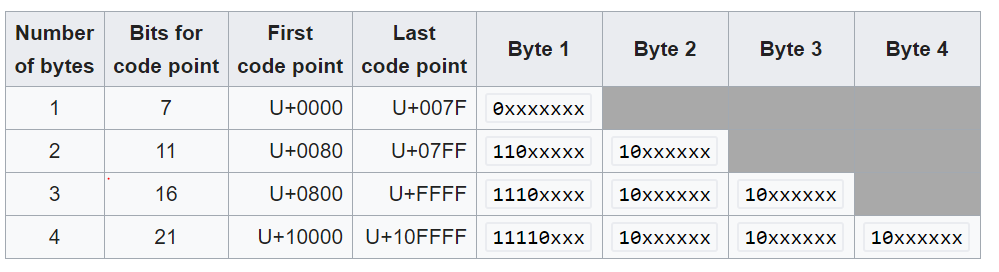

In [196]:
from IPython.display import Image
Image("utf8_figure.png")

The bits of our byte sequence are as follows:

E2 = 1110 0010
84 = 1000 0100
99 = 1001 1001

C6 = 1100 0110
B4 = 1011 0100

E2 = 1110 0010
98 = 1001 1000
82 = 1000 0010

E2 = 1110 0010
84 = 1000 0100
86 = 1000 0110

C3 = 1100 0011
B8 = 1011 1000

E1 = 1110 0001
BC = 1011 1100
A4 = 1010 0100


A unicode string is a sequence of unicode characters. To convert from a byte object to a unicode string we decode (the default decoding is utf-8). When we print that string on the screen, it gets interpreted for us in human-readable form.

In [200]:
unicode_string=mybytes_object.decode()
print(unicode_string)

ℙƴ☂ℌøἤ


Going in the other direction, we can encode our string.

In [203]:
bnew=unicode_string.encode()
bnew

b'\xe2\x84\x99\xc6\xb4\xe2\x98\x82\xe2\x84\x8c\xc3\xb8\xe1\xbc\xa4'

Going in the other direction, if we have a unicode string we can encode it as a bytes object.

In [5]:
bytes_object2=unicode_string.encode('utf-8')
bytes_object2==bytes_object

True

To summarize:

    bytes -> unicode is "decoding"
    
    unicode -> bytes is "encoding"


This page gives a big list of unicode character encodings:

    https://en.wikipedia.org/wiki/List_of_Unicode_characters

As indicated above, if we want to write a unicode string to a file, we need to be careful since the file will consist of bytes. The following generates an error. 

In [6]:
fout=open("string.txt","w")
fout.write(unicode_string)
fout.close()

UnicodeEncodeError: 'charmap' codec can't encode characters in position 0-3: character maps to <undefined>

In any case, to write out unicode string to a file and avoid the error above, we open up a binary file to write to, and encode the unicode string as a bytes object.

In [9]:
fout=open("string.txt","wb")
fout.write(unicode_string.encode('utf-8'))
fout.close()

# Web requests

We typically use the requests package to download a web page.

In [209]:
import requests
req=requests.get("https://news.google.com/news/?ned=us&gl=US&hl=en")
print(req.status_code)

200


The status code of 200 indicates success.

The content of a web page is a byte object.

In [212]:
import requests
req=requests.get("https://news.google.com/news/?ned=us&gl=US&hl=en")
bo=req.content
print(type(bo))
print(len(bo))
print(bo[0:1000])

<class 'bytes'>
1089823
b'<!doctype html><html lang="en" dir="ltr"><head><base href="https://news.google.com/"><meta name="referrer" content="origin"><link rel="canonical" href="https://news.google.com/"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,minimal-ui"><meta name="apple-itunes-app" content="app-id=459182288"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w16" sizes="16x16"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w24" sizes="24x24"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w32" sizes="32x32"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeK

To make a text string out of this, we decode it.

In [213]:
text=bo.decode()
print(len(text))
print(text[0:1000])

1089720
<!doctype html><html lang="en" dir="ltr"><head><base href="https://news.google.com/"><meta name="referrer" content="origin"><link rel="canonical" href="https://news.google.com/"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,minimal-ui"><meta name="apple-itunes-app" content="app-id=459182288"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w16" sizes="16x16"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w24" sizes="24x24"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w32" sizes="32x32"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w48" size

More directly, we can get the text out using .text

In [214]:
import requests
req=requests.get("https://news.google.com/news/?ned=us&gl=US&hl=en")
text=req.text
print(text[0:1000])

<!doctype html><html lang="en" dir="ltr"><head><base href="https://news.google.com/"><meta name="referrer" content="origin"><link rel="canonical" href="https://news.google.com/"><meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1,maximum-scale=1,user-scalable=no,minimal-ui"><meta name="apple-itunes-app" content="app-id=459182288"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w16" sizes="16x16"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w24" sizes="24x24"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w32" sizes="32x32"><link rel="shortcut icon" href="https://lh3.googleusercontent.com/-Ywb4dKmVqHQJnSvbou08pw78G-XvfVk4xp-6zrBgHE8aTCfugOeLqXJPhDOic6JeKL0LHYbUw=w48" sizes="48x48

Here is an example of something that can arise when we try to extract the contents of web pages. If we open the url below in our browser, we see chinese characters.

In [218]:
import webbrowser

# generate an URL
url="http://www.ams.jhu.edu/~dan/FinancialComputingWorkshop/somehtml.html"
webbrowser.open(url)

True

How are these special characters encoded in the html file. To see this we need to see what the source file looks like. (We can also do this in the browser by doing a "view source".)

In [216]:
import requests
url="http://www.ams.jhu.edu/~dan/FinancialComputingWorkshop/somehtml.html"
req=requests.get(url)
text=req.text
print(type(text))
print(text)

<class 'str'>
d>
<body>
<h1>An Illustration of Character Encoding.</h1>
<p>
Here is a message written in english using english characters.
</p>
<p>
What follows is another message written in chinese using chinese characters.
</p>
<p>
&#36825;&#26159;&#19968;&#20123;&#29992;&#33521;&#25991;&#20889;&#30340;&#25991;&#23383;&#12290;&#25105;&#24819;&#27426;&#36814;&#20320;&#26469;&#36825;&#20010;&#29677;&#12290;&#25105;&#24076;&#26395;&#20320;&#33021;&#20174;&#20013;&#24471;&#21040;&#24456;&#22810;&#12290;
</p>
</body>
</html>



What we see is html tags as well as text, but there are also a bunch of expressions of the form &#...; These expressions represent encodings of non-ascii characters. 

These are referred to as html character references.

https://en.wikipedia.org/wiki/Character_encodings_in_HTML

We can see what this page looks like in a browser.

In [ ]:
In a web page, unicode encodings can be used for many, many special characters.
Python can convert to unicode encoding.

In [219]:
import html
answer=html.unescape('&#21040;')
print(answer)
print(type(answer))


到
<class 'str'>


In [221]:
import requests
import html
url="http://www.ams.jhu.edu/~dan/FinancialComputingWorkshop/somehtml.html"
req=requests.get(url)
text=req.text
print(html.unescape(text))

<html>
<body>
<h1>An Illustration of Character Encoding.</h1>
<p>
Here is a message written in english using english characters.
</p>
<p>
What follows is another message written in chinese using chinese characters.
</p>
<p>
这是一些用英文写的文字。我想欢迎你来这个班。我希望你能从中得到很多。
</p>
</body>
</html>



In [27]:
text2=text[231:502]
text3=html.unescape(text2)
print(text3)
type(text3)
print(len(text3))

这是一些用英文写的文字。我想欢迎你来这个班。我希望你能从中得到很多。
34


In [28]:
text3.encode('utf-8')

b'\xe8\xbf\x99\xe6\x98\xaf\xe4\xb8\x80\xe4\xba\x9b\xe7\x94\xa8\xe8\x8b\xb1\xe6\x96\x87\xe5\x86\x99\xe7\x9a\x84\xe6\x96\x87\xe5\xad\x97\xe3\x80\x82\xe6\x88\x91\xe6\x83\xb3\xe6\xac\xa2\xe8\xbf\x8e\xe4\xbd\xa0\xe6\x9d\xa5\xe8\xbf\x99\xe4\xb8\xaa\xe7\x8f\xad\xe3\x80\x82\xe6\x88\x91\xe5\xb8\x8c\xe6\x9c\x9b\xe4\xbd\xa0\xe8\x83\xbd\xe4\xbb\x8e\xe4\xb8\xad\xe5\xbe\x97\xe5\x88\xb0\xe5\xbe\x88\xe5\xa4\x9a\xe3\x80\x82'

In [29]:
fout=open("chinese.txt","wb")
fout.write(text3.encode('utf-8'))
fout.close()

We can now view the file in a text editor and see the byte encodings of the unicode characters. 

In [133]:
text3.encode('utf-8')

b'\xe8\xbf\x99\xe6\x98\xaf\xe4\xb8\x80\xe4\xba\x9b\xe7\x94\xa8\xe8\x8b\xb1\xe6\x96\x87\xe5\x86\x99\xe7\x9a\x84\xe6\x96\x87\xe5\xad\x97\xe3\x80\x82\xe6\x88\x91\xe6\x83\xb3\xe6\xac\xa2\xe8\xbf\x8e\xe4\xbd\xa0\xe6\x9d\xa5\xe8\xbf\x99\xe4\xb8\xaa\xe7\x8f\xad\xe3\x80\x82\xe6\x88\x91\xe5\xb8\x8c\xe6\x9c\x9b\xe4\xbd\xa0\xe8\x83\xbd\xe4\xbb\x8e\xe4\xb8\xad\xe5\xbe\x97\xe5\x88\xb0\xe5\xbe\x88\xe5\xa4\x9a\xe3\x80\x82'

The way that unicode allows for additional bytes and still be backward compatible with ASCII is explained very enthusiastically in this YouTube video:

https://www.youtube.com/watch?v=MijmeoH9LT4&feature=youtu.be&t=372

Once we know what the unicode code point for a character, we can convert that code point into a unicode character using the chr function. Here is an example. We start with a list of code points expressed in decimal.

In [139]:
L=[27426, 36814, 22238, 26469, 12290, 25105, 24076, 26395, 20320, 
   20241, 24687, 19968, 19979, 12290, 29616, 
   22312, 35753, 25105, 20204, 22238, 21435, 24037, 20316, 65292, 25105, 
   20204, 20570, 30340, 26368, 22909, 30340, 20107, 24773, 12290]
mystr=""
for p in L:
    mystr=mystr+chr(p)

In [140]:
mystr

'欢迎回来。我希望你休息一下。现在让我们回去工作，我们做的最好的事情。'

# Removing non-ascii characters from a unicode string

When we process text from an web site, lots of non ascii characters can end up in our strings, and we typically would want to remove them. How to do it? Given a character in a string, it represents an ascii character if and only if its ord() value is < 128.

In [19]:
fout=open("sample_bytes","rb")
bytes_object=fout.read()
fout.close()
unicode_str=bytes_object.decode('utf-8')
unicode_str="Welcome to the details of " + unicode_str + ". Are we having fun?"
print(unicode_str)

Welcome to the details of ℙƴ☂ℌøἤ. Are we having fun?


In [20]:
"".join([ch for ch in unicode_str if ord(ch)<128])

'Welcome to the details of . Are we having fun?'

By the way, there is an amazing collection of characters that can be put in an html document:

    https://www.w3schools.com/charsets/ref_utf_symbols.asp
    
It is informative to view the page source of this page.